# 熊貓數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

#### 準備套件

我們來看幾乎以後都是標準的引入套件, 這次當然增加了引入 `pandas`。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df = pd.read_csv("../grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2. Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

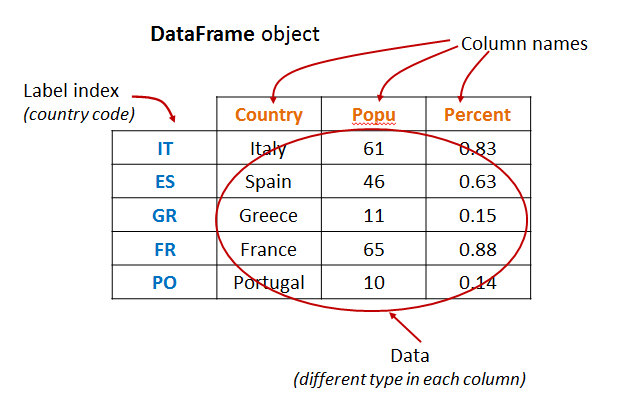

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [4]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
5     13
6     11
7      8
8      9
9     10
10    14
11    13
12    11
13    15
14     8
15    11
16    14
17    12
18     9
19    14
20    13
21     9
22    12
23    10
24    10
25    13
26    13
27     8
28    15
29    14
      ..
70     9
71     9
72    10
73    13
74    14
75    13
76     9
77    13
78    12
79     9
80    13
81    11
82    11
83    10
84    10
85    10
86    11
87    10
88    11
89    13
90     8
91    14
92     8
93    11
94    10
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

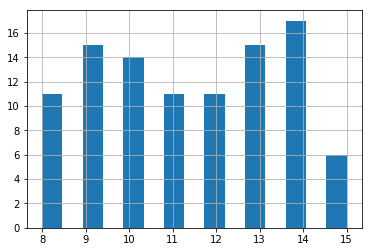

In [5]:
df.國文.hist(bins=15)

## 3. 一些基本的資料分析

算平均。

In [6]:
df.國文.mean()

11.39

算標準差。

In [7]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算

In [8]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [9]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [10]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4. 手工打造一個 DataFrame

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

打造一個簡單的 Series

In [11]:
Taipei_array = np.array([17.0,8.3,20.1,22.6,27.0,27.8,30.1,30.3,29.4,27.1,24.0,17.5])
month = [ 'FEB', 'JAN', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'] 

Taipei_series = pd.Series( Taipei_array , index = month ) 
Taipei_series

FEB    17.0
JAN     8.3
MAR    20.1
APR    22.6
MAY    27.0
JUN    27.8
JUL    30.1
AUG    30.3
SEP    29.4
OCT    27.1
NOV    24.0
DEC    17.5
dtype: float64

In [12]:
Taipei_dic = {'FEB': 17.0, 'JAN': 8.3, 'MAR': 20.1, 'APR': 22.6, 'MAY': 27.0, 'JUN': 27.8, 'JUL': 30.1, 'AUG': 30.3, 'SEP': 29.4, 'OCT': 27.1, 'NOV': 24.0, 'DEC': 17.5} 

Taipei_s = pd.Series(Taipei_dic)
Taipei_s

FEB    17.0
JAN     8.3
MAR    20.1
APR    22.6
MAY    27.0
JUN    27.8
JUL    30.1
AUG    30.3
SEP    29.4
OCT    27.1
NOV    24.0
DEC    17.5
dtype: float64

打造一個簡單的 DataFrame

In [13]:
Temperature = np.array([[17.0,8.3,20.1,22.6,27.0,27.8,30.1,30.3,29.4,27.1,24.0,17.5],
                        [21.1,21.7,22.9,25.7,28.4,28.4,29.4,30.2,29.7,28.9,26.9,21.6]]) 
month = [ 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'] 

Temperature_dataframe = pd.DataFrame(Temperature) 
Temperature_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11
0,17.0,8.3,20.1,22.6,27.0,27.8,30.1,30.3,29.4,27.1,24.0,17.5
1,21.1,21.7,22.9,25.7,28.4,28.4,29.4,30.2,29.7,28.9,26.9,21.6


In [14]:
Temperature_dataframe = pd.DataFrame(Temperature, 
                                     index=['Taipei','Kaohsiung'], columns = month) 
Temperature_dataframe

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Taipei,17.0,8.3,20.1,22.6,27.0,27.8,30.1,30.3,29.4,27.1,24.0,17.5
Kaohsiung,21.1,21.7,22.9,25.7,28.4,28.4,29.4,30.2,29.7,28.9,26.9,21.6


In [15]:
Temperature_dic = {'JAN': [17.0,21.1], 'FEB': [8.3,21.7], 'MAR': [20.1,22.9], 'APR': [22.6,25.7], 'MAY': [27.0,28.4], 'JUN':[27.8,28.4],
                   'JUL': [30.1,29.4], 'AUG': [30.3,30.2], 'SEP': [29.4,29.7], 'OCT': [27.1,28.9], 'NOV':[24.0,26.9], 'DEC': [17.5,21.6]} 
Temperature_dic

{'JAN': [17.0, 21.1],
 'FEB': [8.3, 21.7],
 'MAR': [20.1, 22.9],
 'APR': [22.6, 25.7],
 'MAY': [27.0, 28.4],
 'JUN': [27.8, 28.4],
 'JUL': [30.1, 29.4],
 'AUG': [30.3, 30.2],
 'SEP': [29.4, 29.7],
 'OCT': [27.1, 28.9],
 'NOV': [24.0, 26.9],
 'DEC': [17.5, 21.6]}

In [16]:
Temperature_dataframe = pd.DataFrame(Temperature_dic,
                                     index = ['Taipei','Kaohsiung']) 
Temperature_dataframe

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Taipei,17.0,8.3,20.1,22.6,27.0,27.8,30.1,30.3,29.4,27.1,24.0,17.5
Kaohsiung,21.1,21.7,22.9,25.7,28.4,28.4,29.4,30.2,29.7,28.9,26.9,21.6


## 5. 做些簡單的計算

我們先來計算總級分。基本上就是挑出要算的部份 (我們的例子就是所有科目), 再來就是全部加起來。其實全部加起來有個模糊的地方: 要一列一列加起來 (0), 還是一行一行加起來 (1)。

In [17]:
df["總級分"] = df[["國文", "英文", "數學", "社會", "自然"]].sum(1)

In [18]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


#### 某種主科加權

現在有個系可能想看

    數學 x 1.5 + 英文
    
這樣的分數。怎麼算很容易。

In [19]:
df["主科"] = df.數學 * 1.5 + df.英文

#### 排排序

我們來看總級分最高的 20 位同學。

In [20]:
df.sort_values(by=["總級分"], ascending=False).head(20)

,姓名,國文,英文,數學,自然,社會,總級分,主科
80,施雅鈴,13,15,12,13,13,66,33.0
12,李正偉,11,15,11,14,15,66,31.5
54,陳怡潔,15,15,9,15,11,65,28.5
25,蔡亦瑄,13,13,14,13,12,65,34.0
57,胡淳茜,12,15,14,13,11,65,36.0
37,曾怡君,11,12,15,13,14,65,34.5
48,陳怡婷,15,14,12,9,15,65,32.0
64,俞志峰,9,14,13,14,15,65,33.5
83,李士賢,10,14,15,13,13,65,36.5
87,趙偉希,10,13,14,13,15,65,34.0


先看主科, 再比總級分!

In [21]:
df.sort_values(by=["主科", "總級分"], ascending=False).head(20)

,姓名,國文,英文,數學,自然,社會,總級分,主科
73,吳志遠,13,15,15,8,8,59,37.5
83,李士賢,10,14,15,13,13,65,36.5
57,胡淳茜,12,15,14,13,11,65,36.0
36,詹威德,12,13,15,10,14,64,35.5
70,葉儀依,9,13,15,8,14,59,35.5
68,劉麗芬,8,14,14,14,14,64,35.0
66,邱盈俊,10,14,14,13,8,59,35.0
37,曾怡君,11,12,15,13,14,65,34.5
24,陳竹伯,10,12,15,10,14,61,34.5
76,周育霖,9,12,15,13,12,61,34.5
